In [1]:
from IPython.display import Image
Image(url = 'https://wallpapercave.com/wp/O2nehhH.jpg')

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("D:/KAGGLE/TITANIC/train.csv")
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test = pd.read_csv("D:/KAGGLE/TITANIC/test.csv")
test.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
train.isnull().sum()
print('Train shape: ', train.shape)
test.isnull().sum()
print('Test shape: ', test.shape)

Train shape:  (891, 12)
Test shape:  (418, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# DIRECTIONS

.SIBS = spouses aboard the titanic
.PARCH = childern aboard the titanic

In [8]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
train.isnull().sum() # provides the count of missing data 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()
test['Survived'] = ''
test.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked Survived  
0  34.5      0      0   330911   7.8292   NaN        Q           
1  47.0      1      0   363272   7.0000   NaN        S           
2  62.0      0      0   240276   9.6875   NaN        Q           
3  27.0      0      0   315154   8.6625   NaN        S           
4  22.0      1      1  3101298  12.2875   NaN        S

Data visualization matplotlib and seaborn packages.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()#setting sns default for plot

# Bar Chart Categories and Features

##Pclass

In [12]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 female    233
male      109
Name: Sex, dtype: int64


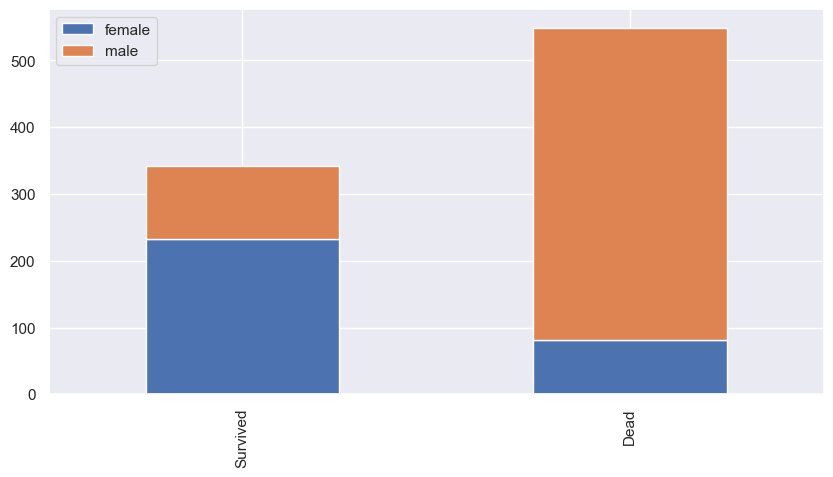

In [13]:
bar_chart('Sex')
print('Survived :\n', train[train['Survived'] == 1]['Sex'].value_counts())
print('Dead:\n', train[train['Survived'] == 1]['Sex'].value_counts())

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead :
 3    372
2     97
1     80
Name: Pclass, dtype: int64


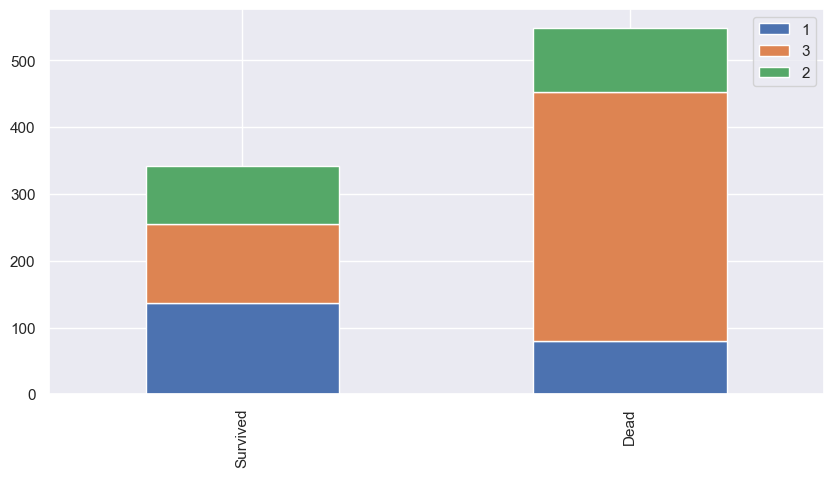

In [14]:
bar_chart('Pclass')
print('Survived :\n',train[train['Survived'] == 1]['Pclass'].value_counts())
print('Dead :\n', train[train['Survived'] == 0]['Pclass'].value_counts())

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead :
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


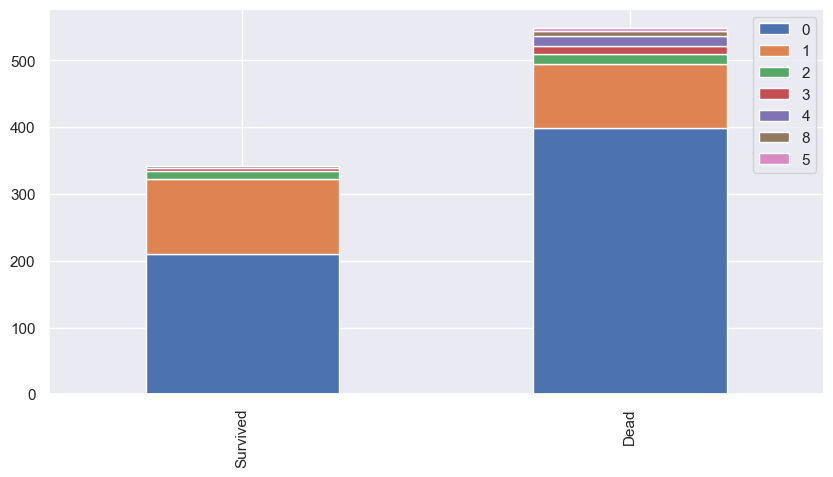

In [15]:
bar_chart('SibSp')
print('Survived :\n', train[train['Survived'] == 1]['SibSp'].value_counts())
print('Dead :\n', train[train['Survived'] == 0]['SibSp'].value_counts())

## person aboarded with >= 2 sibilings/ spouse is likely to survive
## person aboarded with no sibilings or spouse likely to dy

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead :
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


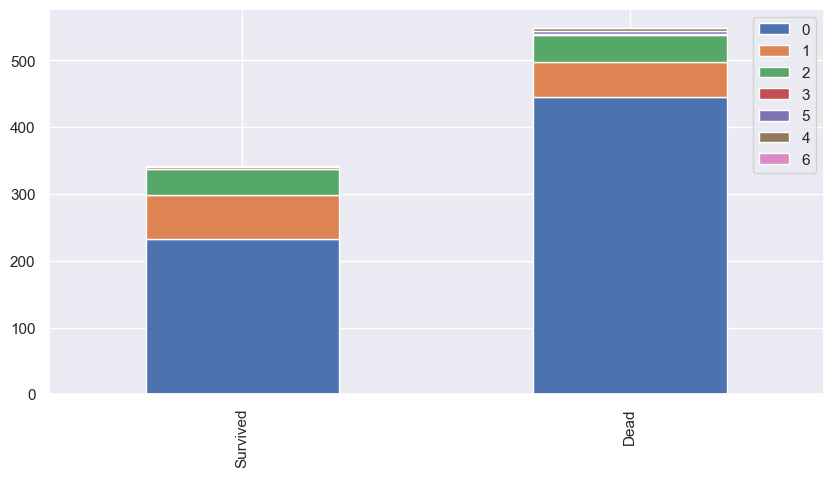

In [16]:
bar_chart('Parch')
print('Survived :\n', train[train['Survived'] == 1]['Parch'].value_counts())
print('Dead :\n', train[train['Survived'] == 0]['Parch'].value_counts())

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead :
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


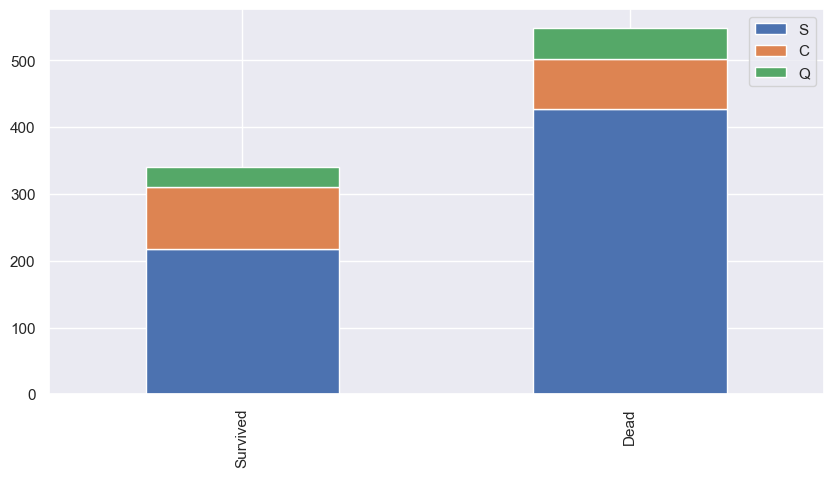

In [17]:
bar_chart('Embarked')
print('Survived :\n', train[train['Survived'] == 1]['Embarked'].value_counts())
print('Dead :\n', train[train['Survived'] == 0]['Embarked'].value_counts())

# Featuring Engineering

In [18]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## titanic sinc

In [19]:
Image(url = 'https://www.google.com/url?sa=i&url=https%3A%2F%2Frss.onlinelibrary.wiley.com%2Fdoi%2F10.1111%2Fj.1740-9713.2019.01229.x&psig=AOvVaw3bLjLvWZzju9Vdrsn0cVp3&ust=1708689733936000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCIC5trfzvoQDFQAAAAAdAAAAABAE')

In [20]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [21]:
train_test_data = [train, test] 
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\. ', expand = False)

In [22]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [23]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

## Title Map
Mr:0, Miss:1, Mrs:2, Others:3

In [24]:
title_mapping = {'Mr': 0,'Miss' : 1, 'Mrs' : 2, 'Master' : 3, 'Dr' : 3, 'Rev' : 3, 'Col' : 3, 'Major' : 3, 'Mlle' : 3, 'Countess' : 3, 'Ms' : 3, 'Lady' : 3, 'Johkheer' : 3, 'Dona' : 3, 'Dona' : 3, 'Mme' : 3, 'Capt' : 3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

dataset


PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0              330911    7.8292   NaN        Q   
1    female  47.0      1      0              363272    7.0000   NaN        S   
2      male  62.0      0      0              240276    9.6875   NaN        Q   
3      male  27.0      0      0              315154    8.6625   NaN        S   
4    female  22.0      1      1             3101298   12.2875   NaN        S   
..      ...   ...    ...    ...                 ...       ...   ...      ...   
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  female  39.0      0      0            PC 17758  108.9000  C105        C   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416    male   NaN      0      0              359309    8.0500   NaN        S   
417    male   NaN      1      1                2668   22.3583   NaN        C   

    Survived  Title  
0                 0  
1                 2  
2                 0  
3                 0  
4                 2  
..       ...    ...  
413               0  
414               3  
415               0  
416               0  
417               3  

[418 rows x 13 columns]

In [25]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S    0.0  
1      0          PC 17599  71.2833   C85        C    2.0  
2      0  STON/O2. 3101282   7.9250   NaN        S    1.0  
3      0            113803  53.1000  C123        S    2.0  
4      0            373450   8.0500   NaN        S    0.0

In [26]:
test.head(4)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   
3          895       3                  Wirz, Mr. Albert    male  27.0      0   

   Parch  Ticket    Fare Cabin Embarked Survived  Title  
0      0  330911  7.8292   NaN        Q               0  
1      0  363272  7.0000   NaN        S               2  
2      0  240276  9.6875   NaN        Q               0  
3      0  315154  8.6625   NaN        S               0

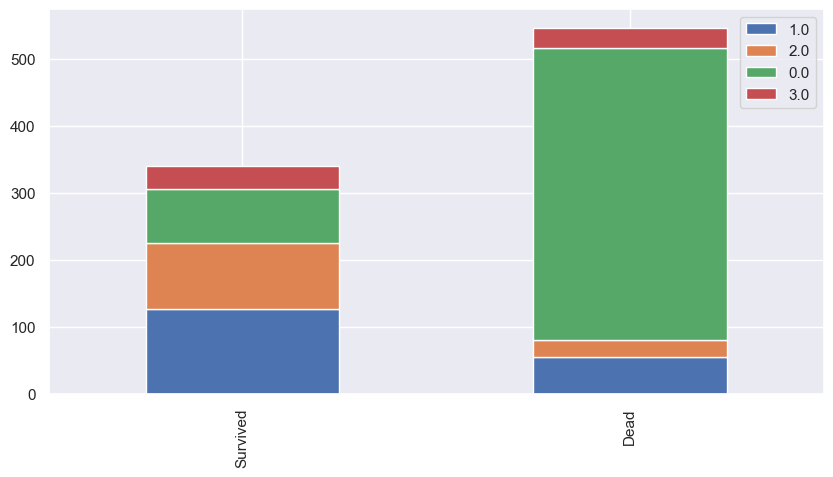

In [27]:
bar_chart('Title')

In [28]:
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [29]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S    0.0  
1          PC 17599  71.2833   C85        C    2.0  
2  STON/O2. 3101282   7.9250   NaN        S    1.0  
3            113803  53.1000  C123        S    2.0  
4            373450   8.0500   NaN        S    0.0

In [30]:
sex_mapping = {'male' : 1, 'female' : 0}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

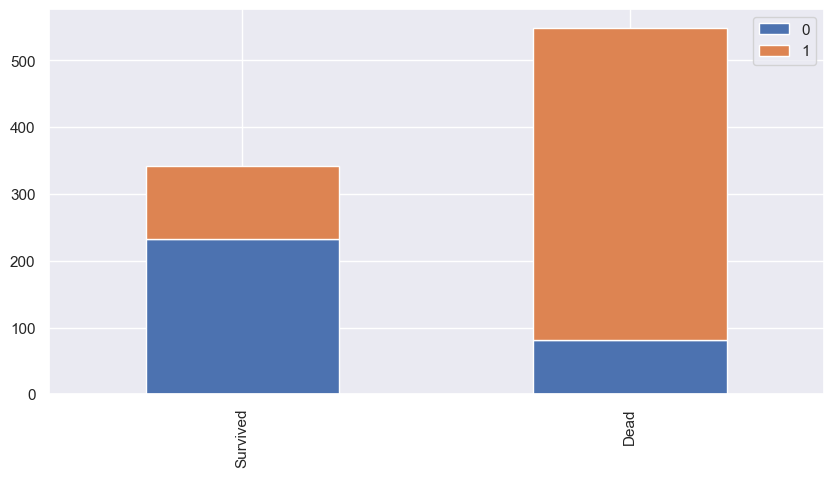

In [31]:
bar_chart('Sex')

In [32]:
test.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    1  34.5      0      0   330911   7.8292   NaN   
1          893       3    0  47.0      1      0   363272   7.0000   NaN   
2          894       2    1  62.0      0      0   240276   9.6875   NaN   
3          895       3    1  27.0      0      0   315154   8.6625   NaN   
4          896       3    0  22.0      1      1  3101298  12.2875   NaN   

  Embarked Survived  Title  
0        Q               0  
1        S               2  
2        Q               0  
3        S               0  
4        S               2

In [33]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [34]:
train.head(40)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0             1         0       3    1  22.0      1      0         A/5 21171   
1             2         1       1    0  38.0      1      0          PC 17599   
2             3         1       3    0  26.0      0      0  STON/O2. 3101282   
3             4         1       1    0  35.0      1      0            113803   
4             5         0       3    1  35.0      0      0            373450   
5             6         0       3    1  28.0      0      0            330877   
6             7         0       1    1  54.0      0      0             17463   
7             8         0       3    1   2.0      3      1            349909   
8             9         1       3    0  27.0      0      2            347742   
9            10         1       2    0  14.0      1      0            237736   
10           11         1       3    0   4.0      1      1           PP 9549   
11           12         1       1    0  58.0      0      0            113783   
12           13         0       3    1  20.0      0      0         A/5. 2151   
13           14         0       3    1  39.0      1      5            347082   
14           15         0       3    0  14.0      0      0            350406   
15           16         1       2    0  55.0      0      0            248706   
16           17         0       3    1   2.0      4      1            382652   
17           18         1       2    1  28.0      0      0            244373   
18           19         0       3    0  31.0      1      0            345763   
19           20         1       3    0  28.0      0      0              2649   
20           21         0       2    1  35.0      0      0            239865   
21           22         1       2    1  34.0      0      0            248698   
22           23         1       3    0  15.0      0      0            330923   
23           24         1       1    1  28.0      0      0            113788   
24           25         0       3    0   8.0      3      1            349909   
25           26         1       3    0  38.0      1      5            347077   
26           27         0       3    1  28.0      0      0              2631   
27           28         0       1    1  19.0      3      2             19950   
28           29         1       3    0  28.0      0      0            330959   
29           30         0       3    1  28.0      0      0            349216   
30           31         0       1    1  40.0      0      0          PC 17601   
31           32         1       1    0  28.0      1      0          PC 17569   
32           33         1       3    0  28.0      0      0            335677   
33           34         0       2    1  66.0      0      0        C.A. 24579   
34           35         0       1    1  28.0      1      0          PC 17604   
35           36         0       1    1  42.0      1      0            113789   
36           37         1       3    1  28.0      0      0              2677   
37           38         0       3    1  21.0      0      0        A./5. 2152   
38           39         0       3    0  18.0      2      0            345764   
39           40         1       3    0  14.0      1      0              2651   

        Fare        Cabin Embarked  Title  
0     7.2500          NaN        S    0.0  
1    71.2833          C85        C    2.0  
2     7.9250          NaN        S    1.0  
3    53.1000         C123        S    2.0  
4     8.0500          NaN        S    0.0  
5     8.4583          NaN        Q    0.0  
6    51.8625          E46        S    0.0  
7    21.0750          NaN        S    3.0  
8    11.1333          NaN        S    2.0  
9    30.0708          NaN        C    2.0  
10   16.7000           G6        S    1.0  
11   26.5500         C103        S    1.0  
12    8.0500          NaN        S    0.0  
13   31.2750          NaN        S    0.0  
14    7.8542          NaN        S    1.0  
15   16.0000       

In [35]:
test.head(40)

PassengerId  Pclass  Sex   Age  SibSp  Parch            Ticket      Fare  \
0           892       3    1  34.5      0      0            330911    7.8292   
1           893       3    0  47.0      1      0            363272    7.0000   
2           894       2    1  62.0      0      0            240276    9.6875   
3           895       3    1  27.0      0      0            315154    8.6625   
4           896       3    0  22.0      1      1           3101298   12.2875   
5           897       3    1  14.0      0      0              7538    9.2250   
6           898       3    0  30.0      0      0            330972    7.6292   
7           899       2    1  26.0      1      1            248738   29.0000   
8           900       3    0  18.0      0      0              2657    7.2292   
9           901       3    1  21.0      2      0         A/4 48871   24.1500   
10          902       3    1  27.0      0      0            349220    7.8958   
11          903       1    1  46.0      0      0               694   26.0000   
12          904       1    0  23.0      1      0             21228   82.2667   
13          905       2    1  63.0      1      0             24065   26.0000   
14          906       1    0  47.0      1      0       W.E.P. 5734   61.1750   
15          907       2    0  24.0      1      0     SC/PARIS 2167   27.7208   
16          908       2    1  35.0      0      0            233734   12.3500   
17          909       3    1  21.0      0      0              2692    7.2250   
18          910       3    0  27.0      1      0  STON/O2. 3101270    7.9250   
19          911       3    0  45.0      0      0              2696    7.2250   
20          912       1    1  55.0      1      0          PC 17603   59.4000   
21          913       3    1   9.0      0      1           C 17368    3.1708   
22          914       1    0  27.0      0      0          PC 17598   31.6833   
23          915       1    1  21.0      0      1          PC 17597   61.3792   
24          916       1    0  48.0      1      3          PC 17608  262.3750   
25          917       3    1  50.0      1      0         A/5. 3337   14.5000   
26          918       1    0  22.0      0      1            113509   61.9792   
27          919       3    1  22.5      0      0              2698    7.2250   
28          920       1    1  41.0      0      0            113054   30.5000   
29          921       3    1  27.0      2      0              2662   21.6792   
30          922       2    1  50.0      1      0        SC/AH 3085   26.0000   
31          923       2    1  24.0      2      0        C.A. 31029   31.5000   
32          924       3    0  33.0      1      2         C.A. 2315   20.5750   
33          925       3    0  27.0      1      2        W./C. 6607   23.4500   
34          926       1    1  30.0      1      0             13236   57.7500   
35          927       3    1  18.5      0      0              2682    7.2292   
36          928       3    0  27.0      0      0            342712    8.0500   
37          929       3    0  21.0      0      0            315087    8.6625   
38          930       3    1  25.0      0      0            345768    9.5000   
39          931       3    1  27.0      0      0              1601   56.4958   

              Cabin Embarked Survived  Title  
0               NaN        Q               0  
1               NaN        S               2  
2               NaN        Q               0  
3               NaN        S               0  
4               NaN        S               2  
5               NaN        S               0  
6               NaN        Q               1  
7               NaN        S               0  
8               NaN        C               2  
9               NaN        S               0  
10              NaN        S               0  
11              NaN        S               0  
12              B45        S               2  
13              NaN        S               0  
14              E3

(10.0, 50.0)

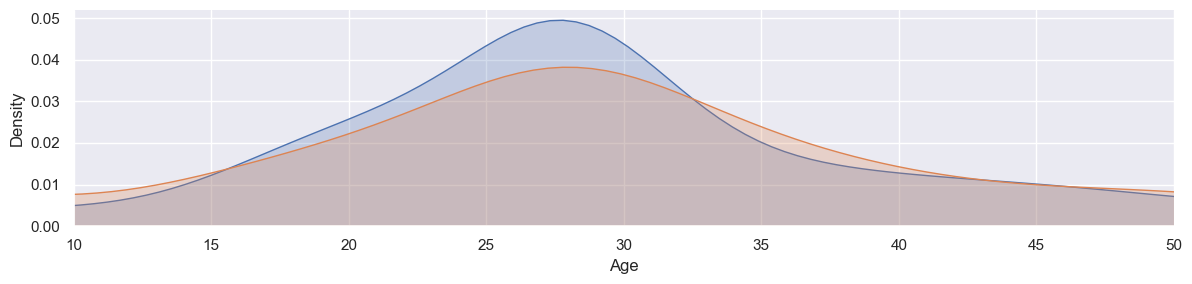

In [36]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', fill = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', fill = True)
facet.set(xlim=(0, train['Age'].max()))
plt.xlim(10,50)

In [37]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        888 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [38]:
train.head(5)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    1  22.0      1      0         A/5 21171   
1            2         1       1    0  38.0      1      0          PC 17599   
2            3         1       3    0  26.0      0      0  STON/O2. 3101282   
3            4         1       1    0  35.0      1      0            113803   
4            5         0       3    1  35.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S    0.0  
1  71.2833   C85        C    2.0  
2   7.9250   NaN        S    1.0  
3  53.1000  C123        S    2.0  
4   8.0500   NaN        S    0.0

In [39]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [40]:
bar_chart('Age')

In [41]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [42]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

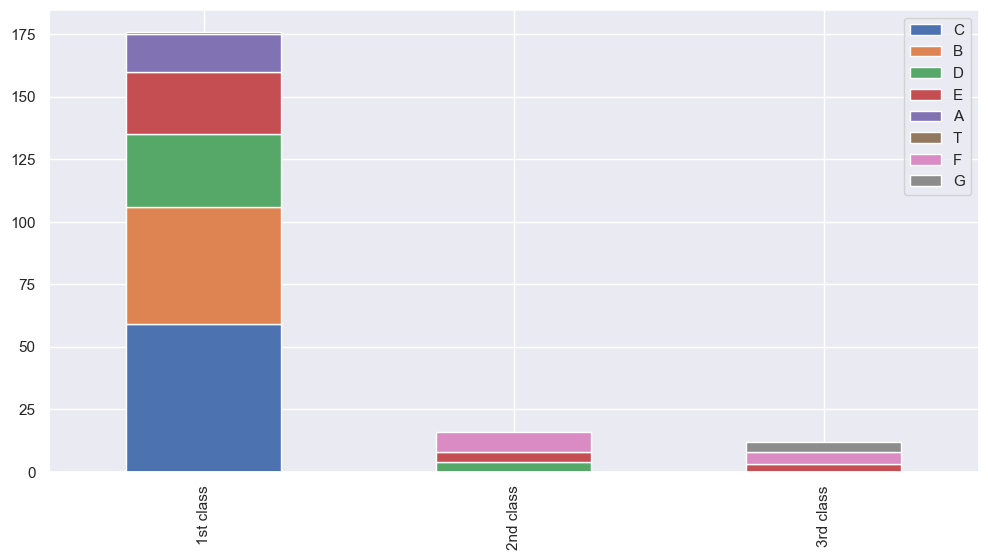

In [43]:
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (12,6))

In [44]:
cabin_mapping = {'A' : 0, 'B' : 0.4, 'C' : 0.8, 'D' : 1.2, 'E' : 1.6, 'F' : 2.0, 'G' : 2.4, 'T' : 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [45]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

In [46]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

(0.0, 11.0)

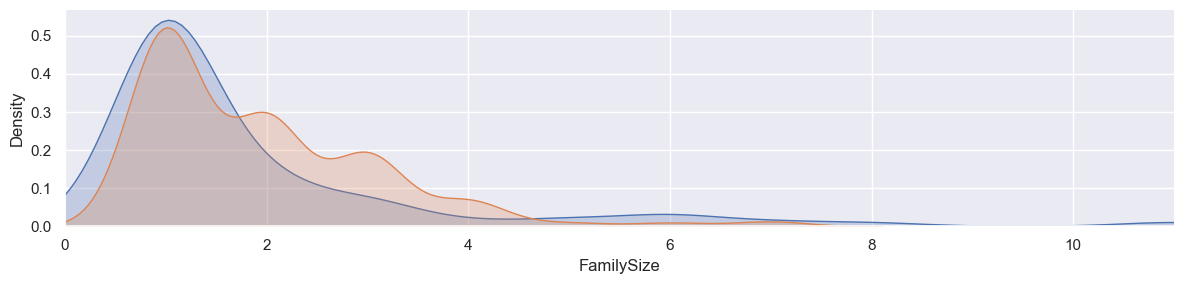

In [47]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', fill = True)
facet.set(xlim = (0, train['FamilySize'].max()))
plt.xlim(0)

In [48]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [49]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    1  1.0      1      0         A/5 21171   
1            2         1       1    0  3.0      1      0          PC 17599   
2            3         1       3    0  1.0      0      0  STON/O2. 3101282   
3            4         1       1    0  2.0      1      0            113803   
4            5         0       3    1  2.0      0      0            373450   

      Fare  Cabin Embarked  Title  FamilySize  
0   7.2500    2.0        S    0.0         0.4  
1  71.2833    0.8        C    2.0         0.4  
2   7.9250    2.0        S    1.0         0.0  
3  53.1000    0.8        S    2.0         0.4  
4   8.0500    2.0        S    0.0         0.0

In [50]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(['PassengerId'], axis = 1)

In [51]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [52]:
train_data.head(10)

Pclass  Sex  Age     Fare  Cabin Embarked  Title  FamilySize
0       3    1  1.0   7.2500    2.0        S    0.0         0.4
1       1    0  3.0  71.2833    0.8        C    2.0         0.4
2       3    0  1.0   7.9250    2.0        S    1.0         0.0
3       1    0  2.0  53.1000    0.8        S    2.0         0.4
4       3    1  2.0   8.0500    2.0        S    0.0         0.0
5       3    1  2.0   8.4583    2.0        Q    0.0         0.0
6       1    1  3.0  51.8625    1.6        S    0.0         0.0
7       3    1  0.0  21.0750    2.0        S    3.0         1.6
8       3    0  2.0  11.1333    2.0        S    2.0         0.8
9       2    0  0.0  30.0708    1.8        C    2.0         0.4

# MODELING 

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    889 non-null    object 
 7   Title       888 non-null    float64
 8   FamilySize  891 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 62.8+ KB


In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)